### 목표 
- 타이타닉 데이터를 학습해서 생존자와 사망자를 예측해보자!
- 이제까지 배운 모든 것을 활용해서 스스로 머신러닝 전체 과정을 진행해보자

In [384]:
# train.csv -> train 변수로 로드해서 담아주기
# test.csv -> test 변수로 로드해서 담아주기
# PassengerID 컬럼을 인덱스로 설정해서 csv 파일을 불러오세요!
# 배웠던 코드들을 활용하여 데이터의 구조를 직접 파악해보세요!

In [385]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer

In [386]:
train = pd.read_csv('data/train.csv', index_col="PassengerId")

In [387]:
test = pd.read_csv('data/test.csv',index_col="PassengerId")

In [388]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S


In [389]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C


In [390]:
test.keys()

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [391]:
train.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [392]:
train['Pclass']

PassengerId
1      3
2      1
3      3
4      1
5      3
6      3
7      1
8      3
9      3
10     2
11     3
12     1
13     3
14     3
15     3
16     2
17     3
18     2
19     3
20     3
21     2
22     2
23     3
24     1
25     3
26     3
27     3
28     1
29     3
30     3
31     1
32     1
33     3
34     2
35     1
36     1
37     3
38     3
39     3
40     3
41     3
42     2
43     3
44     2
45     3
46     3
47     3
48     3
49     3
50     3
51     3
52     3
53     1
54     2
55     1
56     1
57     2
58     3
59     2
60     3
61     3
62     1
63     1
64     3
65     1
66     3
67     2
68     3
69     3
70     3
71     2
72     3
73     2
74     3
75     3
76     3
77     3
78     3
79     2
80     3
81     3
82     3
83     3
84     1
85     2
86     3
87     3
88     3
89     1
90     3
91     3
92     3
93     1
94     3
95     3
96     3
97     1
98     1
99     2
100    2
101    3
102    3
103    1
104    3
105    3
106    3
107    3
108    3
109    3
110    

In [393]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [394]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [395]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


- 결측치가 있는 컬럼들이 존재한다.
- train : Age, Cabin, Embarked
- test: Age, Fare,Cabin

In [396]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [397]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [398]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [399]:
test['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [400]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [401]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [402]:
test['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [403]:
# 불리언 인덱싱 활용
test[test['Cabin']=='B57 B59 B63 B66']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C
956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C


In [404]:
train[train['Embarked']=='S']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S


In [405]:
train[train['Cabin']=='B57 B59 B63 B66']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


### 데이터 전처리

### Age 컬럼의 결측치를 채워보자
- 다른 컬럼들과의 상관관계를 이용하여 결측치를 좀 더 상세하게 채워보자
- 나이는 전체 평균으로 넣기에는 범위가 너무 넓다

In [406]:
# 상관관계: 각 특성들간 영향도를 파악 할 수 있음 (범위: -1(반비례) ~ 1(비례))
# 절대 값이 클수록 영향도가 높아짐
train.corr() #train 데이터 셋에서 수치형 데이터만 출력이 됨

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [407]:
test.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


- Age 컬럼과 상관관계가 높은 Pclass 컬럼을 활용해보자
- 생존에 관련이 많았던 성별 컬럼을 함께 활용해보자

In [408]:
# train 데이터 프레임에 있는 값들로 피벗테이블을 만들어보자
# 피벗 테이블: 컬럼들의 요약된 정보를 출력할 수 있는 테이블 형태
pt1 = train.pivot_table(values='Age', # 데이터로 사용될 열(컬럼)을 지정 
                       # 멀티 인덱스 설정
                       index = ['Pclass', 'Sex'],
                       # 데이터 요약시 사용하는 함수를 지정
                       # (mean: 평균, sum: 합계, count: 개수)
                        aggfunc='mean'
                       
                       )

In [409]:
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [410]:
# 멀티인덱싱
pt1.loc[1,'female']

Age    34.611765
Name: (1, female), dtype: float64

In [411]:
# null 값이 있는지를 판단하는 명령 (있으면 True, 없으면 False)
# pd.isna(train['Age']) # 수치형, 문자형 데이터 모두 판단

np.isnan(train['Age']) # 넘파이에서 제공하는 isnan은 수치형 데이터만 판단함
# train['Age'].isnull() # 수치형, 문자형 데이터 모두 판단

PassengerId
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18      True
19     False
20      True
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29      True
30      True
31     False
32      True
33      True
34     False
35     False
36     False
37      True
38     False
39     False
40     False
41     False
42     False
43      True
44     False
45     False
46      True
47      True
48      True
49      True
50     False
51     False
52     False
53     False
54     False
55     False
56      True
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65      True
66      True
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False


In [412]:
pd.isna(train['Cabin'])

PassengerId
1       True
2      False
3       True
4      False
5       True
6       True
7      False
8       True
9       True
10      True
11     False
12     False
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22     False
23      True
24     False
25      True
26      True
27      True
28     False
29      True
30      True
31      True
32     False
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53     False
54      True
55     False
56     False
57      True
58      True
59      True
60      True
61      True
62     False
63     False
64      True
65      True
66      True
67     False
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76     False


- Age의 결측치를 채워주는 함수를 만들어서 한번에 적용시켜버리자~

In [413]:
def fill_age(data):# 매개변수 data에는 train 혹은 test가 들어가게 됨
    # 만약 Age 컬럼이 결측치라면 피벗테이블에서 값을 가져올게요
    if pd.isna(data['Age']): 
        # 위 피벗테이블에서 멀티인덱싱한 값을 리턴
        return pt1.loc[data['Pclass'], data['Sex']]
    # Age 컬럼이 결측치가 아니라면 원래 나이 값을 그대로 사용
    else:
        return data['Age']
        

In [414]:
train['Age']

PassengerId
1      22.00
2      38.00
3      26.00
4      35.00
5      35.00
6        NaN
7      54.00
8       2.00
9      27.00
10     14.00
11      4.00
12     58.00
13     20.00
14     39.00
15     14.00
16     55.00
17      2.00
18       NaN
19     31.00
20       NaN
21     35.00
22     34.00
23     15.00
24     28.00
25      8.00
26     38.00
27       NaN
28     19.00
29       NaN
30       NaN
31     40.00
32       NaN
33       NaN
34     66.00
35     28.00
36     42.00
37       NaN
38     21.00
39     18.00
40     14.00
41     40.00
42     27.00
43       NaN
44      3.00
45     19.00
46       NaN
47       NaN
48       NaN
49       NaN
50     18.00
51      7.00
52     21.00
53     49.00
54     29.00
55     65.00
56       NaN
57     21.00
58     28.50
59      5.00
60     11.00
61     22.00
62     38.00
63     45.00
64      4.00
65       NaN
66       NaN
67     29.00
68     19.00
69     17.00
70     26.00
71     32.00
72     16.00
73     21.00
74     26.00
75     32.00
76     25.00


In [415]:
# apply : 데이터 프레임에서 행 또는 열에 한번에 복잡한 계산을 적용하고 싶을때 사용
train['Age']= train.apply(fill_age, axis=1).astype('int64')
# astype : 데이터의 타입을 변경시켜주는 명령 (int64: 정수형으로 변경)

# fill_age라는 함수에 train이라는 매개변수를 넣어서 열 방향으로 연산을 진행 

In [416]:
test['Age']=test.apply(fill_age, axis=1).astype('int64')

In [417]:
test['Age']

PassengerId
892     34
893     47
894     62
895     27
896     22
897     14
898     30
899     26
900     18
901     21
902     26
903     46
904     23
905     63
906     47
907     24
908     35
909     21
910     27
911     45
912     55
913      9
914     34
915     21
916     48
917     50
918     22
919     22
920     41
921     26
922     50
923     24
924     33
925     21
926     30
927     18
928     21
929     21
930     25
931     26
932     39
933     41
934     41
935     30
936     45
937     25
938     45
939     26
940     60
941     36
942     24
943     27
944     20
945     28
946     30
947     10
948     35
949     25
950     26
951     36
952     17
953     32
954     18
955     22
956     13
957     28
958     18
959     47
960     31
961     60
962     24
963     21
964     29
965     28
966     35
967     32
968     26
969     55
970     30
971     24
972      6
973     67
974     49
975     26
976     30
977     26
978     27
979     18
980     21
981      

In [418]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Embarked 채우기
- train 데이터의 Embarked 컬럼에는 결측치가 2개 밖에 없네
- Embarked는 문자형 데이터이기 때문에 수치형 데이터처럼 평균치로 볼 수가 없음

In [419]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [420]:
# fillna: 지정된 값으로 결측치를 채워주는 명령
train['Embarked']= train['Embarked'].fillna('S')

In [421]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


### Fare 채우기

In [422]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [423]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- Fare 컬럼도 최대, 최소값에 비해 평균이 최소값 쪽으로 쏠려 있음
- 무작정 전체 평균으로 계산하기에는 신뢰성이 떨어질 수도 있을 것 같네..

In [424]:
test.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.520540,0.001087,0.018721,-0.577147
Age,-0.520540,1.000000,-0.084936,-0.062898,0.348593
SibSp,0.001087,-0.084936,1.000000,0.306895,0.171539
Parch,0.018721,-0.062898,0.306895,1.000000,0.230046
Fare,-0.577147,0.348593,0.171539,0.230046,1.000000


In [425]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [426]:
pt2 = train.pivot_table(values = 'Fare',
                        index =['Pclass','Sex'],
                        aggfunc = 'mean'
                           )
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [427]:
pd.set_option('display.max_rows',None)
test['Fare'].isnull()

PassengerId
892     False
893     False
894     False
895     False
896     False
897     False
898     False
899     False
900     False
901     False
902     False
903     False
904     False
905     False
906     False
907     False
908     False
909     False
910     False
911     False
912     False
913     False
914     False
915     False
916     False
917     False
918     False
919     False
920     False
921     False
922     False
923     False
924     False
925     False
926     False
927     False
928     False
929     False
930     False
931     False
932     False
933     False
934     False
935     False
936     False
937     False
938     False
939     False
940     False
941     False
942     False
943     False
944     False
945     False
946     False
947     False
948     False
949     False
950     False
951     False
952     False
953     False
954     False
955     False
956     False
957     False
958     False
959     False
960     False
961     False
962     

In [428]:
# 불리언 인덱싱을 활용하여 Null값인 행을 찾아보자!!
# 불리언 인덱싱은 True, False로 판단할 수 있는 조건으로만 설정
test['Fare'].isnull()

PassengerId
892     False
893     False
894     False
895     False
896     False
897     False
898     False
899     False
900     False
901     False
902     False
903     False
904     False
905     False
906     False
907     False
908     False
909     False
910     False
911     False
912     False
913     False
914     False
915     False
916     False
917     False
918     False
919     False
920     False
921     False
922     False
923     False
924     False
925     False
926     False
927     False
928     False
929     False
930     False
931     False
932     False
933     False
934     False
935     False
936     False
937     False
938     False
939     False
940     False
941     False
942     False
943     False
944     False
945     False
946     False
947     False
948     False
949     False
950     False
951     False
952     False
953     False
954     False
955     False
956     False
957     False
958     False
959     False
960     False
961     False
962     

In [429]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [430]:
# test[test["Fare"]==None]

In [431]:
test['Fare'] = test['Fare'].fillna(12.661633)

In [432]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 채우기

In [433]:
test['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [434]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [435]:
train['Cabin'].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
F33                3
E101               3
D                  3
C22 C26            3
F2                 3
E8                 2
C123               2
D36                2
B35                2
D17                2
C78                2
B57 B59 B63 B66    2
B20                2
C52                2
C93                2
D33                2
E25                2
B22                2
D26                2
B77                2
E121               2
B18                2
E33                2
E44                2
C92                2
C83                2
C124               2
F4                 2
E67                2
F G73              2
C125               2
C68                2
B58 B60            2
D20                2
E24                2
D35                2
C2                 2
C126               2
C65                2
B49                2
B5                 2
B28                2
B51 B53 B55        2
B3                 1
A31          

In [436]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [437]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- cabin 컬럼은 유니크 값이 너무 많음(데이터가 넓게 분포되어 있음)
- 객실 번호 컬럼에서 각각의 숫자값이 큰 의미가 있을까?
- 앞에 영문자는 일정한 구역이나 층을 의미하지 않을까?
- => 앞에 영문자만 따와서 활용해보자!

In [438]:
# train, test 데이터에서 Cabin 컬럼의 결측치를 임의로 문자 M으로 채운 Deck 컬럼을 새롭게 만든다.
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [439]:
train['Deck']

PassengerId
1                    M
2                  C85
3                    M
4                 C123
5                    M
6                    M
7                  E46
8                    M
9                    M
10                   M
11                  G6
12                C103
13                   M
14                   M
15                   M
16                   M
17                   M
18                   M
19                   M
20                   M
21                   M
22                 D56
23                   M
24                  A6
25                   M
26                   M
27                   M
28         C23 C25 C27
29                   M
30                   M
31                   M
32                 B78
33                   M
34                   M
35                   M
36                   M
37                   M
38                   M
39                   M
40                   M
41                   M
42                   M
43                   M

In [440]:
# Deck 컬럼에서 맨 앞에 있는 영문자만 따오기
train['Deck'] = train['Deck'].str[0]
test['Deck']= test['Deck'].str[0]

In [441]:
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
6      M
7      E
8      M
9      M
10     M
11     G
12     C
13     M
14     M
15     M
16     M
17     M
18     M
19     M
20     M
21     M
22     D
23     M
24     A
25     M
26     M
27     M
28     C
29     M
30     M
31     M
32     B
33     M
34     M
35     M
36     M
37     M
38     M
39     M
40     M
41     M
42     M
43     M
44     M
45     M
46     M
47     M
48     M
49     M
50     M
51     M
52     M
53     D
54     M
55     B
56     C
57     M
58     M
59     M
60     M
61     M
62     B
63     C
64     M
65     M
66     M
67     F
68     M
69     M
70     M
71     M
72     M
73     M
74     M
75     M
76     F
77     M
78     M
79     M
80     M
81     M
82     M
83     M
84     M
85     M
86     M
87     M
88     M
89     C
90     M
91     M
92     M
93     E
94     M
95     M
96     M
97     A
98     D
99     M
100    M
101    M
102    M
103    D
104    M
105    M
106    M
107    M
108    M
109    M
110    

In [442]:
train['Cabin']

PassengerId
1                  NaN
2                  C85
3                  NaN
4                 C123
5                  NaN
6                  NaN
7                  E46
8                  NaN
9                  NaN
10                 NaN
11                  G6
12                C103
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 NaN
22                 D56
23                 NaN
24                  A6
25                 NaN
26                 NaN
27                 NaN
28         C23 C25 C27
29                 NaN
30                 NaN
31                 NaN
32                 B78
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43                 NaN

In [443]:
# train, test 데이터에서 기존에 있던 Cabin 컬럼을 지워보자!

train.drop('Cabin', axis=1, inplace = True)
test.drop('Cabin',axis=1, inplace =True)

In [444]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- 결측치 채우기 끝~

### 탐색적 데이터 분석

#### Deck 컬럼 시각화

In [445]:
# groupby : 그룹별로 데이터를 집계, 요약 해보는 명령(그룹으로 묶어서 인덱스로 설정)
train_deck = train[['Deck','Survived', 'Name']].groupby(['Deck','Survived']).count()
train_deck

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [446]:
#train.pivot_table(values ='Name',
#                 index = ['Deck','Survived'],
#                aggfunc ='count'
#                      )

In [447]:
# seaborn: 시각화 라이브러리
# matplotlib에 비해 색상이 좀 더 깔끔하고 그래프를 그리는 기본 성능이 좋음
# pandas와의 호환성도 좋음
import seaborn as sns

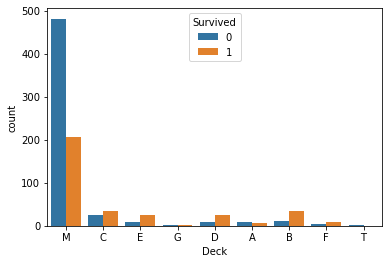

In [448]:
# countplot : 데이터의 개수를 출력해주는 차트
sns.countplot(data = train,
              # Deck 컬럼의 unique 값들이 각각의 bar차트로 표시됨
              x = 'Deck',
              # hue : 해당 컬럼의 unique 값들이 들어가서 출력되고 
              hue = 'Survived'
             );

- M(결측치가 있었던 데이터)에서 상대적으로 사람들이 많이 죽었네...
- 생존여부를 판단하는데 활용해도 괜찮을 것 같다.

#### Pclass 컬럼 시각화

In [449]:
# countplot을 활용하여 Pclass를 시각화해보세요!

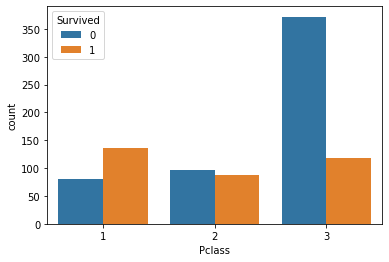

In [450]:
sns.countplot(data = train,
              x = 'Pclass',
              hue = 'Survived'
             );

- Pclass가 3등급이면 많이 죽는구나..

#### Deck과 Pclass를 시각화

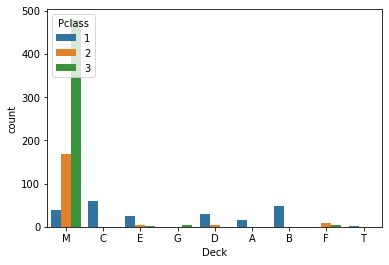

In [451]:
sns.countplot(data = train,
              x = 'Deck',
              hue = 'Pclass'
             );

#### Sex, Embarked 컬럼을 시각화해보자!

In [452]:
# Sex - Survived

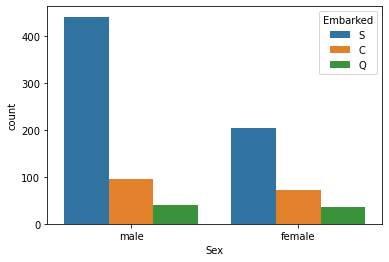

In [453]:
sns.countplot(data = train,
              x = 'Sex',
              hue = 'Embarked'
             );

- 남자가 많이 죽었구나...

In [454]:
# Embarked - Survived

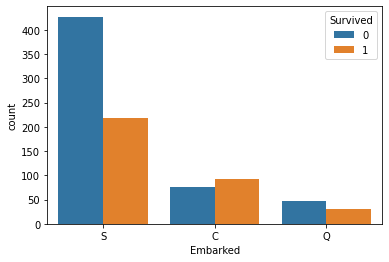

In [455]:
sns.countplot(data = train,
              x = 'Embarked',
              hue = 'Survived'
             );

- 탑승항구가 S인 곳에서 탑승한 사람들의 수가 많았고, 사망자 수치도 높았음
- C항에서 승선한 사람들의 생존 비율이 높았음

In [456]:
# Sex - Embarked

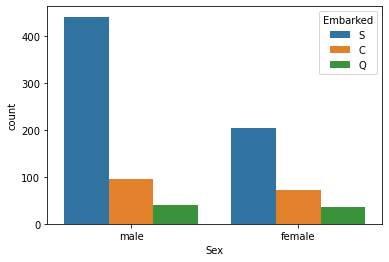

In [457]:
sns.countplot(data = train,
              x = 'Sex',
              hue = 'Embarked'
             );

- S항에서 가장 많은 사람들의 승선했고, 남자의 비율이 가장 높았음

#### Age 컴럼 시각화

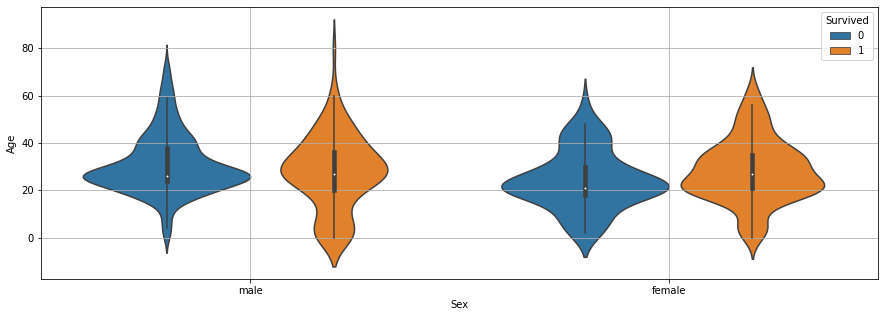

In [458]:
plt.figure (figsize =(15,5))

sns.violinplot (data = train,
                x= 'Sex',
                y= 'Age',
                hue ='Survived',
                # True일 경우 두 그룹을 하나의 바이올린 형태로 나타내줌
                split =False
             );
plt.grid()

# 가운데 흰색 점은 중앙값 (Median)
# 바이올린 중앙의 두꺼운 선은 사분위 범위
# 수치값 (실수)과 같이 연속된 데이터의 경우 모든 유니크값을 표시할 수가 없기 때문에
# -> Bar차트로 표시할 때는 범위와 구간을 설정해줘야 함 (각진 형태)
# -> violinplot은 미분을 활용하여 데이터의 밀도를 확률적으로 나타내는 방식 (곡선 형태)

- 20대 ~ 30대의 탑승자가 많았고 사망자도 많았네!
- 20대 미만의 미성년자들 중에서는 남자가 여자에 비해서 많이 살았네!

### Fare 컬럼 시각화

In [459]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


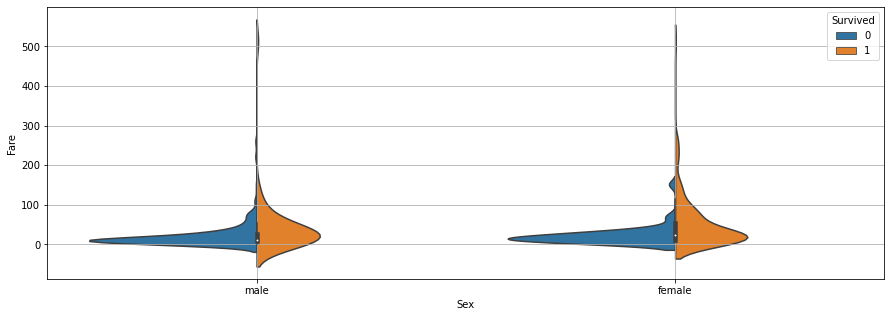

In [460]:
plt.figure (figsize =(15,5))

sns.violinplot (data = train,
                x= 'Sex',
                y= 'Fare',
                hue ='Survived',
                # True일 경우 두 그룹을 하나의 바이올린 형태로 나타내줌
                split =True
             );
plt.grid()

- 요금이 저렴한 사람들은 상대적으로 많이 죽었네..

### Parch - 함께 탑승한 부모자식의 수
### SibSb - 함께 탑승한 형제자매, 배우자의 수

- Parch와 SibSb을 더해서 전체 가족의 숫자라는 새로운 컬럼을 생성해보자!

In [461]:
# 전체 가족의 숫자라는 새로운 컬럼 생성
train['Family_Size'] = train['Parch']+train['SibSp'] +1
test['Family_Size'] = test['Parch']+test['SibSp'] +1

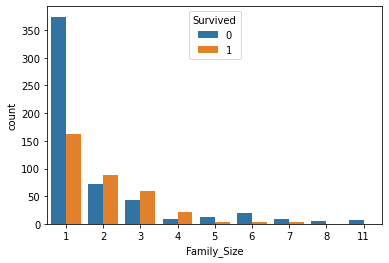

In [462]:
sns.countplot( data = train,
              x= 'Family_Size',
              hue ='Survived'
                    );

- 1명일 때는 죽은 비율이 높고, 2~4명 일때는 산 비율이 높고, 5명 이상이라면 죽은 비율이 높다!

- 가족 사이즈가 1이면 Alone, 2~4dlaus Small, 5이상이면 Large, 3가지의 범주로 그룹화 시켜주자!

In [463]:
# 전체 가족의 숫자를 범주화 하여 Family_Group 컬럼을 새로 생성
# bins: 범주의 경계를 지정
# labels: 범주의 명칭을 지정
bins_size =[0,1,4,11]
labels_size = ['Alone','Small','Large']

train['Family_Group'] = pd.cut(train['Family_Size'], bins =bins_size, labels =labels_size)
test['Family_Group']= pd.cut(test['Family_Size'], bins =bins_size, labels =labels_size)

In [464]:
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
6      Alone
7      Alone
8      Large
9      Small
10     Small
11     Small
12     Alone
13     Alone
14     Large
15     Alone
16     Alone
17     Large
18     Alone
19     Small
20     Alone
21     Alone
22     Alone
23     Alone
24     Alone
25     Large
26     Large
27     Alone
28     Large
29     Alone
30     Alone
31     Alone
32     Small
33     Alone
34     Alone
35     Small
36     Small
37     Alone
38     Alone
39     Small
40     Small
41     Small
42     Small
43     Alone
44     Small
45     Alone
46     Alone
47     Small
48     Alone
49     Small
50     Small
51     Large
52     Alone
53     Small
54     Small
55     Small
56     Alone
57     Alone
58     Alone
59     Small
60     Large
61     Alone
62     Alone
63     Small
64     Large
65     Alone
66     Small
67     Alone
68     Alone
69     Large
70     Small
71     Alone
72     Large
73     Alone
74     Small
75     Alone
76     Alone


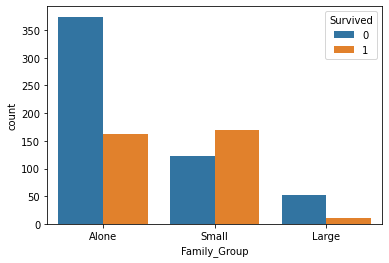

In [465]:
sns.countplot( data = train,
              x= 'Family_Group',
              hue ='Survived'
                    );

#### Text 데이터 다뤄보기!
- Name 컬럼의 중간 호칭만 추출해보자

In [466]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
6                                       Moran, Mr. James
7                                McCarthy, Mr. Timothy J
8                         Palsson, Master. Gosta Leonard
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
12                              Bonnell, Miss. Elizabeth
13                        Saundercock, Mr. William Henry
14                           Andersson, Mr. Anders Johan
15                  Vestrom, Miss. Hulda Amanda Adolfina
16                      Hewlett, Mrs. (Mary D Kingcome) 
17                                  Rice, Master. Eugene
18                 

In [467]:
train['Name'][1]

'Braund, Mr. Owen Harris'

In [468]:
train['Name'][1].split(',')[1]

' Mr. Owen Harris'

In [469]:
train['Name'][1].split(',')[1].split('.')[0]

' Mr'

In [470]:
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [471]:
# 이름의 중간 호칭만 추출하는 함수를 만들어보자!
def split_title(data):
    return data.split(',')[1].split('.')[0].strip() #좌측이 0, 우측이 1

In [472]:
train['Title']=train['Name'].apply(split_title)
test['Title']=test['Name'].apply(split_title)

# tain.apply라면 train은 데이터프레임(행과 열로 이루어진 2차원 테이블)이라서 axis를 설정
# train['Name'].apply 라면 train['Name']dms tlflwm (열로만 이루어진 1차원)이라서 axis를 설정하지 않음.

In [473]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [474]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

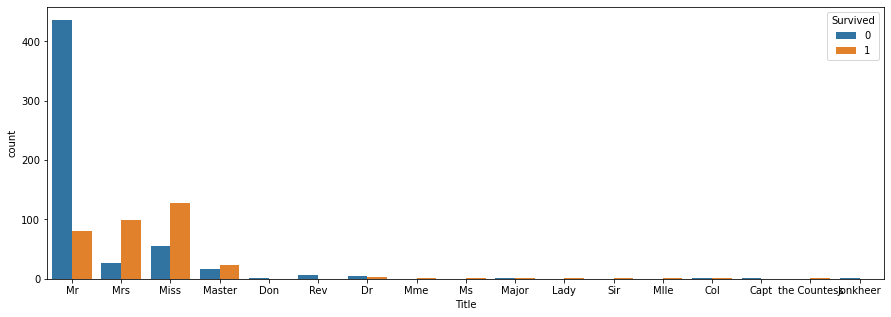

In [475]:
plt.figure(figsize =(15,5))
sns.countplot (data =train,
              x='Title',
              hue ='Survived');

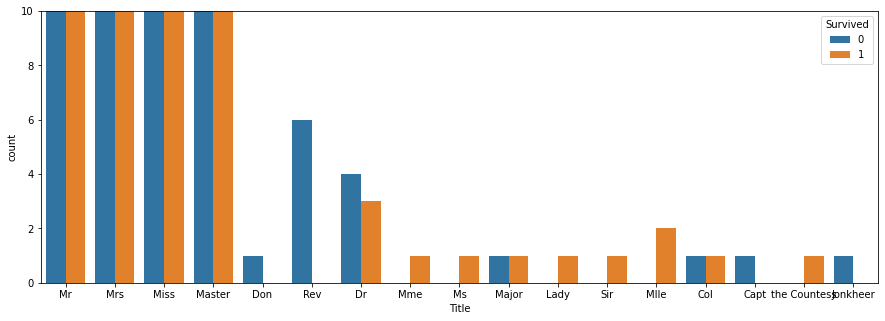

In [476]:
plt.figure(figsize =(15,5))
plt.ylim(0,10) # y축의 범위를 0~10까지로 설정
sns.countplot (data =train,
              x='Title',
              hue ='Survived');

- 목사님(Rev)들은 전부 돌아가심.. 숭고한 희생정신..

In [477]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [478]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

- Mr, Mrs, Miss, Master, Rev를 제외한 호칭들은 상대적으로 개수가 적기 때문에 Other로 묶어주자!

In [479]:
# train['Title']컬럼의 unique 값들을 그대로 복사해서 title이라는 리스트에 담기!
# Don과 Rev의 순서를 바꿔주기 (zip함수 사용시 순서를 맞춰주기 위함)
title =['Mr', 'Mrs', 'Miss', 'Master', 'Rev','Don' , 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']
title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Don',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [480]:
len(title)

17

In [481]:
# 중요한 호칭들 5가지만 그대로 사용하고 나머지는 Other로 변환하여 리스트로 저장
convert_title = ['Mr','Mrs','Miss','Master','Rev']+['Other']*12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [482]:
len(convert_title)

17

In [483]:
# zip 함수를 사용하여 리스트 형태인 title과 convert_title을 차례대로
# key값 (title): value값 (convert_title)으로 만드는 딕셔너리를 생성
title_dict = dict(zip(title, convert_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [484]:
# title_dict를 통해서 실제 Title 컬럼을 변경시키기
# 딕셔너리 key값 -> 딕셔너리 value값으로 변경

train['Title'] = train['Title'].map(title_dict)

In [485]:
train['Title'].tail(70)

PassengerId
822        Mr
823     Other
824       Mrs
825    Master
826        Mr
827        Mr
828    Master
829        Mr
830       Mrs
831       Mrs
832    Master
833        Mr
834        Mr
835        Mr
836      Miss
837        Mr
838        Mr
839        Mr
840        Mr
841        Mr
842        Mr
843      Miss
844        Mr
845        Mr
846        Mr
847        Mr
848        Mr
849       Rev
850       Mrs
851    Master
852        Mr
853      Miss
854      Miss
855       Mrs
856       Mrs
857       Mrs
858        Mr
859       Mrs
860        Mr
861        Mr
862        Mr
863       Mrs
864      Miss
865        Mr
866       Mrs
867      Miss
868        Mr
869        Mr
870    Master
871        Mr
872       Mrs
873        Mr
874        Mr
875       Mrs
876      Miss
877        Mr
878        Mr
879        Mr
880       Mrs
881       Mrs
882        Mr
883      Miss
884        Mr
885        Mr
886       Mrs
887       Rev
888      Miss
889      Miss
890        Mr
891        Mr
Name: Ti

In [486]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [487]:
# test 데이터에만 Dona라는 호칭이 존재하기 때문에 title_dict에 따로 Dona를 만듬
title_dict['Dona']="Other"
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [488]:
# Dona라는 호칭을 가진 승객을 불리언 인덱싱으로 확인
test[test['Title']=='Dona'] 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_Size,Family_Group,Title
PassengerId,,,,,,,,,,,,,
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C,C,1,Alone,Dona


In [489]:
# test['Title'] = test['Title'].map(title_dict)

In [490]:
# Dona가 추가된 title_dict를 활용하여 test데이터 매핑시켜주기!!
test['Title'] =test['Title'].map(title_dict)

In [491]:
test['Title']

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
897         Mr
898       Miss
899         Mr
900        Mrs
901         Mr
902         Mr
903         Mr
904        Mrs
905         Mr
906        Mrs
907        Mrs
908         Mr
909         Mr
910       Miss
911        Mrs
912         Mr
913     Master
914        Mrs
915         Mr
916        Mrs
917         Mr
918       Miss
919         Mr
920         Mr
921         Mr
922         Mr
923         Mr
924        Mrs
925        Mrs
926         Mr
927         Mr
928       Miss
929       Miss
930         Mr
931         Mr
932         Mr
933         Mr
934         Mr
935        Mrs
936        Mrs
937         Mr
938         Mr
939         Mr
940        Mrs
941        Mrs
942         Mr
943         Mr
944       Miss
945       Miss
946         Mr
947     Master
948         Mr
949         Mr
950         Mr
951       Miss
952         Mr
953         Mr
954         Mr
955       Miss
956     Master
957        Mr

####  필요없는 컬럼 삭제하기

In [492]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    object  
 10  Deck          891 non-null    object  
 11  Family_Size   891 non-null    int64   
 12  Family_Group  891 non-null    category
 13  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 138.4+ KB


In [493]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           418 non-null    int64   
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          418 non-null    float64 
 8   Embarked      418 non-null    object  
 9   Deck          418 non-null    object  
 10  Family_Size   418 non-null    int64   
 11  Family_Group  418 non-null    category
 12  Title         418 non-null    object  
dtypes: category(1), float64(1), int64(5), object(6)
memory usage: 43.0+ KB


In [494]:
# Ticket 컬럼은 데이터의 정보를 활용하기가 애매해서 삭제 시켜줄 것
train.drop('Ticket',axis=1,inplace =True)
test.drop('Ticket',axis=1,inplace =True)

In [495]:
train.drop('Name',axis=1,inplace =True)
test.drop('Name',axis=1,inplace =True)

In [496]:
train.drop('SibSp',axis=1,inplace =True)
test.drop('SibSp',axis=1,inplace =True)

In [497]:
train.drop('Parch',axis=1,inplace =True)
test.drop('Parch',axis=1,inplace =True)

In [498]:
train.drop('Family_Size',axis=1,inplace =True)
test.drop('Family_Size',axis=1,inplace =True)

In [499]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
 8   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 103.6+ KB


In [500]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   Fare          418 non-null    float64 
 4   Embarked      418 non-null    object  
 5   Deck          418 non-null    object  
 6   Family_Group  418 non-null    category
 7   Title         418 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 26.6+ KB


### 모델링(데이터 가공, 모델 선택, 학습, 평가)
- 문제와 정답 데이터로 분리

In [501]:
# train 데이터에서 정답 컬럼
y_train = train['Survived']
# train 데이터에서 정답 컬럼을 삭제한 후 남은 모든 컬럼들0
X_train = train.drop('Survived',axis=1)
# 맨 처음에 받았던 test.csv
X_test =  test

In [502]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 8)
(891,)
(418, 8)


In [503]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
 8   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 103.6+ KB


- 문자형 데이터 인코딩

In [504]:
# 원 핫 인코딩
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [505]:
print(X_train.shape)
print(X_test.shape)

(891, 26)
(418, 25)


In [506]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [507]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

- 인코딩 후 X_train과 X_test 데이터의 컬럼 개수가 차이가 나게됨
- 기계 학습을 위해서는 컬럼의 개수를 똑같이 맞춰줘야 함

In [508]:
# set 명령을 활용하여 일일이 찾지 않고 바로 어떤 컬럼이 다른지 확인가능
# set: 중복이 없는 요소들 (unique)로만 구성된 집합
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

- X_train에는 없는 X_test에 없는 Deck_T라는 컬럼이 존재함!

In [509]:
X_train[X_train['Deck_T']==1]

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
340,1,45,35.5,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0


In [510]:
# 기계학습을 위해 X_test에 'Deck_T' 컬럼을 생성해보자!
X_test['Deck_T'] =0

# Deck_T의 컬럼은 생기지만 컴퓨터는 데이터가 없는 것으로 간주함

In [511]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [512]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev',
       'Deck_T'],
      dtype='object')

- 기계학습을 위해 X_train, X_test 컬럼들의 순서를 맞춰줘야함!
- X_train의 'Deck_T'를 맨 마지막으로 옮기자

In [513]:
# Deck_T 컬럼은 tmp 변수에 임시로 저장
tmp = X_train['Deck_T']

In [514]:
# X_train 데이터프레임에서 Deck_T 컬럼을 삭제
X_train.drop('Deck_T', axis =1, inplace =True)

In [515]:
# 삭제된 X_train에서 tmp를 맨 우측에 붙여주기
X_train = pd.concat([X_train,tmp],axis=1)
X_train

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,7.2500,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,38,71.2833,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,26,7.9250,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,35,53.1000,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
5,3,35,8.0500,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
6,3,26,8.4583,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7,1,54,51.8625,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
8,3,2,21.0750,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
9,3,27,11.1333,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [516]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev',
       'Deck_T'],
      dtype='object')

In [517]:
print(X_train.shape)
print(X_test.shape)

(891, 26)
(418, 26)


- 모델링을 위한 데이터 가공 끝!!!!!!!!!!!!!!!!

### 모델 선택

In [523]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#### Tree 모델 적용

In [524]:
tree_model = DecisionTreeClassifier(max_depth=3)

In [525]:
# train 데이터에 decision tree 모델로 교차검증을 적용하여 정확도를 판단해보자!
# 교차검증을 활용하면 학습부터 평가까지 한번에 진행됨
result_DT = cross_val_score(tree_model,
                            X_train,
                            y_train,
                            cv= 5
                                   )
result_DT

array([0.82681564, 0.79213483, 0.8258427 , 0.78651685, 0.84831461])

In [527]:
# 평균값 구하기
result_DT.mean()

0.8159249262444291

In [537]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [538]:
result_KNN = cross_val_score (knn_model,
                            X_train,
                             y_train,
                             cv=5)
result_KNN

array([0.72067039, 0.71348315, 0.74719101, 0.75842697, 0.7247191 ])

In [539]:
result_KNN.mean()

0.7328981231561108

- KNN 모델에 스케일링 적용

In [547]:
scaler = StandardScaler()

In [548]:
scaler.fit(X_train)

StandardScaler()

In [549]:
transform_X_train = scaler.transform (X_train)

In [550]:
transform_X_train

array([[ 0.82737724, -0.5404969 , -0.50244517, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-1.56610693,  0.66195688,  0.78684529, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346, -0.48885426, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       ...,
       [ 0.82737724, -0.61565027, -0.17626324, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-1.56610693, -0.23988346, -0.04438104, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724,  0.21103671, -0.49237783, ..., -0.15536387,
        -0.0823387 , -0.03352008]])

In [551]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 0.82737724,  0.36134344, -0.49078316, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724,  1.33833714, -0.50747884, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-0.36936484,  2.46563756, -0.45336687, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       ...,
       [ 0.82737724,  0.66195688, -0.50244517, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346, -0.48633742, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346, -0.19824428, ..., -0.15536387,
        -0.0823387 , -0.03352008]])

In [552]:
# 스케일링 된 결과로 교차검증을 적용해보자!
result_KNN_SS = cross_val_score(knn_model,
                                transform_X_train,
                                y_train,
                                cv =5
                                       )
result_KNN_SS

array([0.79888268, 0.76404494, 0.80337079, 0.78089888, 0.83707865])

In [553]:
result_KNN_SS.mean()

0.7968551879982424

### Kaggle 제출용 파일을 만들어보자!

In [554]:
# 캐글 제출을 위한 출력 파일의 포맷
result_submission = pd.read_csv ('data/gender_submission.csv')
result_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [560]:
knn_model.fit(transform_X_train,y_train) # 모델 학습
pre = knn_model.predict(transform_X_test) # 모델로 예측

In [561]:
pre

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [562]:
result_submission['Survived'] = pre

In [564]:
# csv 파일로 저장 후 내보내기
# 내보내진 파일은 현재 주피터 노트북과 같은 폴더에 만들어짐
result_submission.to_csv('submission_tree2.csv', index =False)